<h2>Systemy Inteligentne 2, Laboratorium 4 - Algorytm genetyczny</h2>
<h2>Wykonawca Łukasz Tracz 234011</h2>

<h2>Import bibliotek</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from geneticAlgorithm.GeneticAlgorithm import GeneticAlgorithm
from geneticAlgorithm.fun.ConcreteFunction import ConcreteFunction
from geneticAlgorithm.lib.config.ConfigGeneticAlgorithm import ConfigGeneticAlgorithm
from geneticAlgorithm.lib.config.GenotypePhenotypeConfigSingleton import GenotypePhenotypeConfigSingleton
from geneticAlgorithm.lib.selection.RankedSelection import RankedSelection
from geneticAlgorithm.lib.selection.RouletteWheelSelection import RouletteWheelSelection
from geneticAlgorithm.lib.stopconditionals.StopByAchieveValueFunction import StopByAchieveValueFunction
from geneticAlgorithm.lib.stopconditionals.StopByPercentageBestIndividualsInPopulation import \
    StopByPercentageBestIndividualsInPopulation

<h2>Skonfigurowanie własności dla genotypów i feonotypów naszych osobników<h2>

In [2]:
config_genotype_phenotype = GenotypePhenotypeConfigSingleton()
config_genotype_phenotype.min_phenotype_value = -8
config_genotype_phenotype.max_phenotype_value = 8
config_genotype_phenotype.set_and_count_number_of_bits_to_write_integer()
config_genotype_phenotype.number_of_bits_on_floating_part = 28

<h2>Przygotowanie konfiguracji algorytmu gentycznego</h2>

In [3]:
config_genetic_algorithm = ConfigGeneticAlgorithm(probability_of_crossing=0.8,
                                                  number_points_to_crossing=4,
                                                  probability_of_mutation=0.05,
                                                  number_points_to_mutation=1,
                                                  size_of_population=1000)


<h2>Okreslenie warunku stopu naszego algorytmu</h2>

In [4]:
# stop_condition = StopByNumberOfGenerations(number_of_generation_to_stop=100)
# stop_condition = StopByPercentageBestIndividualsInPopulation(percentage_the_best_individuals=0.95)
stop_condition = StopByAchieveValueFunction(value_function_to_stop=256.0, epsilon=0.1)

<h2>Utworzenie obiektu naszej funckji celu do obliczania wartości przystosowania</h2>
<h2>$f(x,y) = -x^2 + y^2 -2xy$</h2>

In [5]:
function = ConcreteFunction()

<h2>Wybranie algorytmu selekcji</h2>

In [6]:
selection_algorithm = RouletteWheelSelection()
# selection_algorithm = RankedSelection(number_of_individuals_to_swap=50)

<h2>Utworzenie instacji klasy do obsługi algorytmu genetycznego</h2>

In [7]:
genetic_algorithm = GeneticAlgorithm(config=config_genetic_algorithm,
                                     stop_condition=stop_condition,
                                     function=function,
                                     selection_algorithm=selection_algorithm,
                                     debug=False)

<h2>Uruchomienie ewolucji</h2>

In [8]:
genetic_algorithm.start()

Found individual which accepted criterion value adaption after  215  cycle

{
phenotype_x: -7.998303771018982	phenotype_y: 7.999056372791529
genotype_x: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]	genotype_y: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
value_of_adaptation: 255.91553157077703
}
Found individual which accepted criterion value adaption after  215  cycle

{
phenotype_x: -7.998303771018982	phenotype_y: 7.999056372791529
genotype_x: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]	genotype_y: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
value_of_adaptation: 255.91553157077703
}


<h2>Przedstawienie wykresu najlepszej znalezionej wartości funkcji przystosowania w populacji od numeru pokolenia</h2>

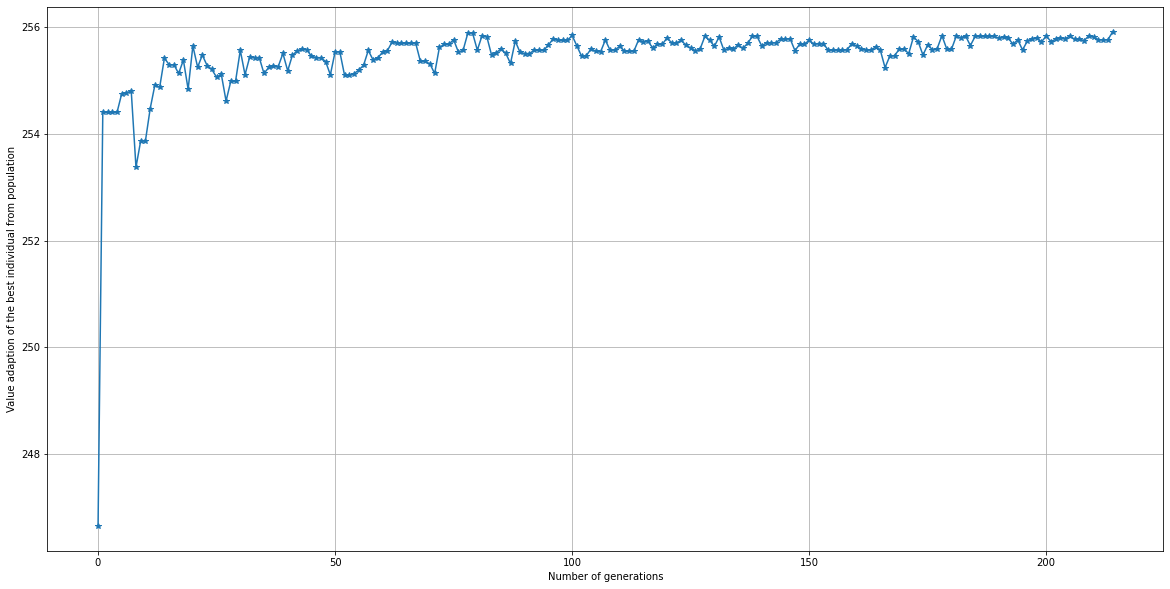

In [9]:
history = genetic_algorithm.history_max_value_adaption

x = np.arange(0, len(history))
plt.figure(figsize=(20,10))
plt.plot(x, history,'-*')
plt.grid()
plt.xlabel('Number of generations')
plt.ylabel('Value adaption of the best individual from population')
plt.show()
